# Project(mid-term) : Predicting Software Reselling Profits
### 제출일 : 2023.04.17
### 성명 및 학번 : 오혜민(2023254013)

In [51]:
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

%matplotlib inline

In [52]:
Tayko_df = dmba.load_data('Tayko.csv')
Tayko_df = Tayko_df.rename(columns={'Web order': 'Web_order', 'Gender=male': 'Gender_male'})
Tayko_df.head(10)

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web_order,Gender_male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,128
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0
5,6,1,0,0,0,0,0,0,0,0,...,0,0,1,1995,2002,0,0,1,0,0
6,7,1,0,0,0,0,0,0,0,0,...,0,1,2,1498,1529,0,0,1,0,0
7,8,1,0,0,1,0,0,0,0,0,...,0,0,1,3397,3397,0,1,0,0,0
8,9,1,1,0,0,0,0,0,0,0,...,0,0,4,525,2914,1,1,0,1,489
9,10,1,1,0,0,0,0,0,0,0,...,0,0,1,3215,3215,0,0,0,1,174


'US', 'Freq', 'last_update_days_ago', 'Web_order', 'Gender_male', 'Address_is_res', 'Spending'

## a. 범주형 변수들에 대한 테이블을 만들고, 각 범주별로 소비금액의 평균과 표준편차를 계산하시오.

In [53]:
Tayko_df.groupby(['US','Web_order', 'Gender_male', 'Address_is_res'])['Spending'].agg(['mean', 'std'])

mean         std
US Web_order Gender_male Address_is_res                        
0  0         0           0                88.794872  128.541909
                         1                90.720000  124.186862
             1           0                97.375000  247.698999
                         1                34.350000   65.728529
   1         0           0               145.033333  207.982477
                         1               147.857143  135.462659
             1           0                90.612903  113.034792
                         1               122.166667  163.709184
1  0         0           0                83.226866  180.829234
                         1                89.200000  137.592235
             1           0                82.638961  185.693750
                         1                70.316667  119.516321
   1         0           0               139.133065  244.576612
                         1               120.488372  147.957764
             1           0               131.706452  201.918727
                         1               108.766667  125.435832

In [54]:
Tayko_df.groupby(['Freq', 'last_update_days_ago', 'Web_order'])['Spending'].agg(['mean', 'std'])

mean  std
Freq last_update_days_ago Web_order             
0    55                   0             0.0  NaN
     71                   0             0.0  NaN
     77                   0             0.0  NaN
     90                   0             0.0  NaN
     91                   0             0.0  NaN
...                                     ...  ...
11   918                  0          1441.0  NaN
12   220                  0          1446.0  NaN
     520                  1          1195.0  NaN
13   281                  1          1443.0  NaN
15   192                  0          1133.0  NaN

[1477 rows x 2 columns]

## b. 연속형 변수들에 대하여 산점도(2개)를 작성하여 소비금액과의 관계를 탐색하시오(Spending 대 Freq, Spending 대 last_update_days_ago). 이들이 선형관계가 있어 보이는가?

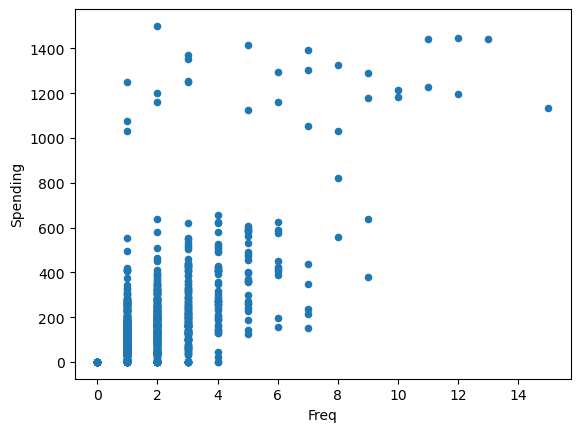

In [55]:
Tayko_df = dmba.load_data('Tayko.csv')
Tayko_df.plot.scatter(x='Freq', y='Spending', legend=False)
plt.show()

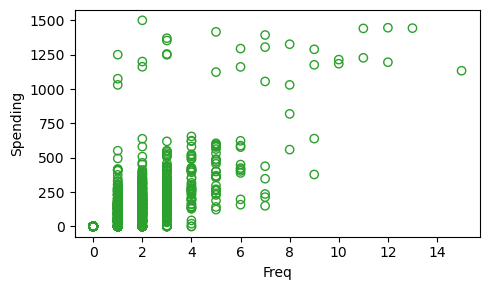

In [56]:
# Set the color of the points in the scatterplot and draw as open circles.
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)

ax.scatter(Tayko_df.Freq, Tayko_df.Spending, color='C2', facecolor='none')
plt.xlabel('Freq')
plt.ylabel('Spending')

plt.tight_layout()
plt.show()

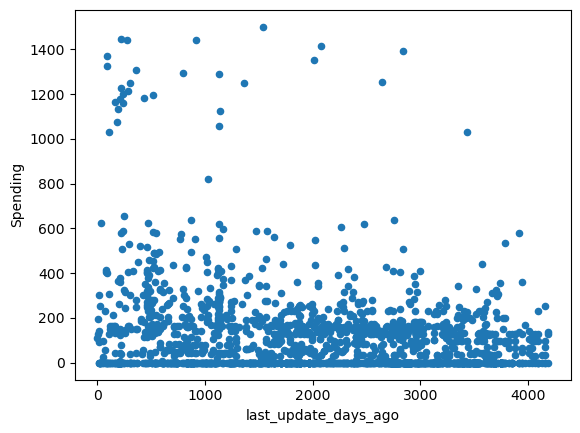

In [57]:
Tayko_df = dmba.load_data('Tayko.csv')
Tayko_df.plot.scatter(x='last_update_days_ago', y='Spending', legend=False)
plt.show()

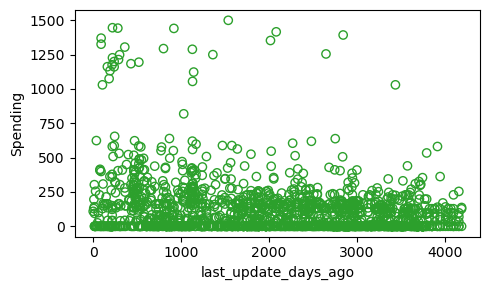

In [58]:
# Set the color of the points in the scatterplot and draw as open circles.
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)

ax.scatter(Tayko_df.last_update_days_ago, Tayko_df.Spending, color='C2', facecolor='none')
plt.xlabel('last_update_days_ago')
plt.ylabel('Spending')

plt.tight_layout()
plt.show()

## c. Spending에 대한 예측모델을 적합시키기 위해:

## 1) 2,000개의 레코드를 학습 데이터와 검증 데이터로 나누시오.  
## 2)Spending을 결과변수로 설정하고 위 표의 6개 예측변수를 사용하여 다중 선형회귀 모델을 만드시오. 추정된 회귀모델식을 구하시오.

#### ** 모델 계수 추정 결과  
합습데이터 0.4, 검증데이터 0.6 적용

In [59]:
Tayko_df = Tayko_df.rename(columns={'Web order': 'Web_order', 'Gender=male': 'Gender_male'})

predictors = ['US', 'Freq', 'last_update_days_ago', 'Web_order', 'Gender_male', 'Address_is_res']
outcome = 'Spending'

# partition data
X = pd.get_dummies(Tayko_df[predictors], drop_first=True)
y = Tayko_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

Tayko_lm = LinearRegression()
Tayko_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', Tayko_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': Tayko_lm.coef_}))

# print performance measures
regressionSummary(train_y, Tayko_lm.predict(train_X))

intercept  10.176297414608968
              Predictor  coefficient
0                    US    -4.620293
1                  Freq    91.274450
2  last_update_days_ago    -0.010374
3             Web_order    18.628731
4           Gender_male    -9.111366
5        Address_is_res   -75.815354

Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 125.9999
     Mean Absolute Error (MAE) : 79.4772


In [60]:
pred_y = Tayko_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, Tayko_lm))
print('AIC : ', AIC_score(train_y, pred_y, Tayko_lm))
print('BIC : ', BIC_score(train_y, pred_y, Tayko_lm))

adjusted r2 :  0.5221321114376755
AIC :  15028.52685802683
BIC :  15069.247472713037


#### ** 검증 셋의 데이터에 대한 예측값

In [61]:
# Use predict() to make predictions on a new set
Tayko_lm_pred = Tayko_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': Tayko_lm_pred, 'Actual': valid_y, 'Residual': valid_y - Tayko_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, Tayko_lm_pred)

       Predicted  Actual     Residual
674    89.214915       0   -89.214915
1699  202.231362     184   -18.231362
1282   49.159303       0   -49.159303
1315  824.841659    1289   464.158341
1210    0.121196       0    -0.121196
1636   86.766675       0   -86.766675
613    58.018614       0   -58.018614
447   247.428569    1255  1007.571431
1131   67.036615       0   -67.036615
808    67.825031       0   -67.825031
1496   -7.098168       0     7.098168
1468  194.814024     411   216.185976
1682  -13.480101       0    13.480101
1149  -32.457046       0    32.457046
442    61.247979       0   -61.247979
1813    4.497885     173   168.502115
654   -46.046854       0    46.046854
1264  -32.315195       0    32.315195
858    80.219048       0   -80.219048
1482   51.783900       0   -51.783900

Regression statistics

               Mean Error (ME) : 7.1933
Root Mean Squared Error (RMSE) : 136.7397
     Mean Absolute Error (MAE) : 83.6010


#### ** 잔차에 대한 히스토그램(테스트용 데이터 셋)

1.0


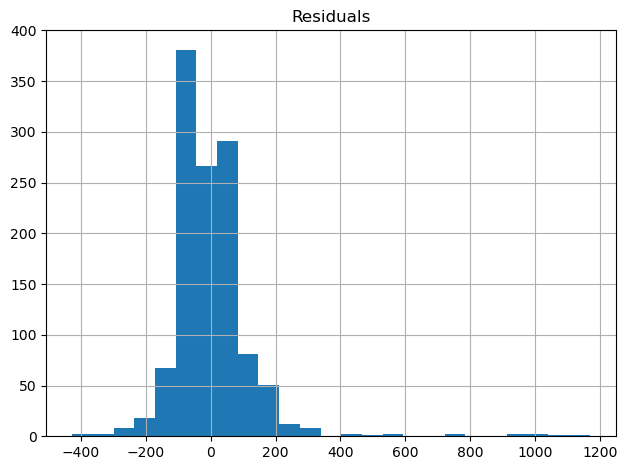

In [69]:
Tayko_lm_pred = Tayko_lm.predict(train_X)
all_residuals = train_y - Tayko_lm_pred

# Determine the percentage of datapoints with a residual in [-1406, 1406] = approx. 75\%
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()

#### ** 잔차에 대한 히스토그램(검증용 데이터 셋)

1.0


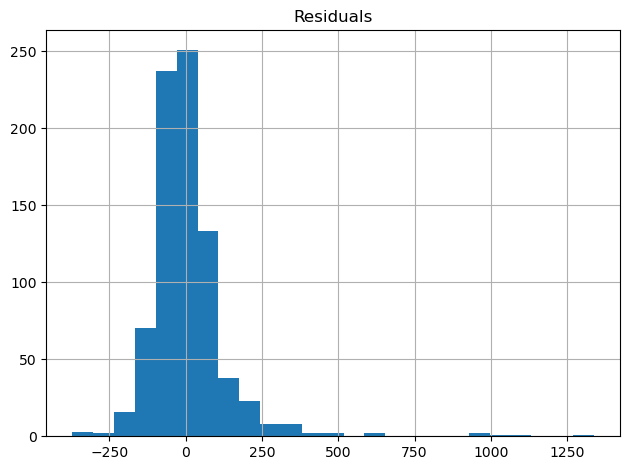

In [62]:
Tayko_lm_pred = Tayko_lm.predict(valid_X)
all_residuals = valid_y - Tayko_lm_pred

# Determine the percentage of datapoints with a residual in [-1406, 1406] = approx. 75\%
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()

## 3) 이 모델을 기반으로 하였을 때, 가장 많은 돈을 지출할 것 같은 구매고객의 유형은 무엇인가?

#### ** 전역탐색을 통해 중요한 변수 파악
Run an exhaustive search. The Fuel type column is categorical and needs to be converted into dummy variables.

In [63]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')

   n     r2adj           AIC  Address_is_res  Freq  Gender_male     US  Web_order  \
0  1  0.490719  15099.943551           False  True        False  False      False   
1  2  0.516880  15037.660282            True  True        False  False      False   
2  3  0.520135  15030.544822            True  True        False  False      False   
3  4  0.522193  15026.383156            True  True        False  False       True   
4  5  0.522440  15026.758078            True  True         True  False       True   
5  6  0.522132  15028.526858            True  True         True   True       True   

   last_update_days_ago  
0                 False  
1                 False  
2                  True  
3                  True  
4                  True  
5                  True  


## 4) 예측변수들의 수를 줄이기 위하여 후진제거 방법을 사용한다면, 어떠한 예측변수가 모델로부터 가장 먼저 탈락되겠는가?

#### ** 후진제거

In [64]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: US, Freq, last_update_days_ago, Web_order, Gender_male, Address_is_res
Start: score=15028.53
Step: score=15026.76, remove US
Step: score=15026.38, remove Gender_male
Step: score=15026.38, remove None
['Freq', 'last_update_days_ago', 'Web_order', 'Address_is_res']


#### ** 후진제거 이후 테스트 데이터 셋을 통해 성능 비교

In [67]:
regressionSummary(train_y, best_model.predict(train_X[best_variables]))


Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 126.0974
     Mean Absolute Error (MAE) : 79.5622


#### ** 후진제거 이후 검증용 데이터 셋을 통해 성능 비교

In [68]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

               Mean Error (ME) : 6.9616
Root Mean Squared Error (RMSE) : 136.5274
     Mean Absolute Error (MAE) : 83.4472
